# DeepDive PLOS Corpus Performance Tests

**Current system configuration**
* 4 cores
* 64GB RAM
* database data directory on internal 256GB SSD
* ~123k documents in corpus (~72GB) -- raw data directory stored at `/disk` (internal 1TB HD)

## Memory status
* Ran `free -s 1 -t > "test_ram_"`date +%F_%H%M%S`".out"`

## CPU status
* get individual CPU output by running 'top' and pressing '1'
* ...then save this configuration by typing "W" (creates .toprc file)
* Ran `top -b -d 1 -u sandip | awk '/load average/ {n=10} {if (n-- > 0) {print}}' > "test_cpu_"`date +%F_%H%M%S`".out"`


## `deepdive run`

* Data directory on internal 256GB SSD
    * wall time: ??
    * memory status log: `test_ram_2016-01-15_110632.out`
    * summary:
    
### Output files:

In [1]:
!ls *.out

test_cpu_2016-02-05_115007.out test_ram_2016-02-05_115007.out


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn

seaborn.set()

In [3]:
!head test_ram_2016-02-05_115007.out

             total       used       free     shared    buffers     cached
Mem:      65922828    5093152   60829676      55336     736152    3238760
-/+ buffers/cache:    1118240   64804588
Swap:     33496060          0   33496060
Total:    99418888    5093152   94325736

             total       used       free     shared    buffers     cached
Mem:      65922828    5131904   60790924      55336     736180    3239132
-/+ buffers/cache:    1156592   64766236
Swap:     33496060          0   33496060


In [4]:
from collections import OrderedDict

def get_mem_used_free(filename):
    
    ''' given an input mem test file, output a tuple of pandas series
        (mem_used, mem_free)
    '''

    with open(filename) as f:
        mem_lines = [line.rstrip('\n') for line in f.readlines() if line.startswith('Mem:')]

    mem_used = OrderedDict()
    mem_free = OrderedDict()

    for line_num, line in enumerate(mem_lines):
        mem_used_val, mem_free_val = [int(x) for x in line.split()[2:4]]
        mem_used[line_num] = mem_used_val
        mem_free[line_num] = mem_free_val

    return pd.Series(mem_used), pd.Series(mem_free)

In [5]:
df = pd.DataFrame()
df['run_1_mem_used'], df['run_1_mem_free'] = get_mem_used_free('test_ram_2016-02-05_115007.out')
df['run_1_mem_used_gb'] = df['run_1_mem_used']/(1024*1024)

df

,run_1_mem_used,run_1_mem_free,run_1_mem_used_gb
0,5093152,60829676,4.857208
1,5131904,60790924,4.894165
2,5205288,60717540,4.964149
3,5362052,60560776,5.113651
4,5480932,60441896,5.227024
5,5552812,60370016,5.295574
6,5586340,60336488,5.327549
7,5596036,60326792,5.336796
8,5710604,60212224,5.446056
9,5733632,60189196,5.468018


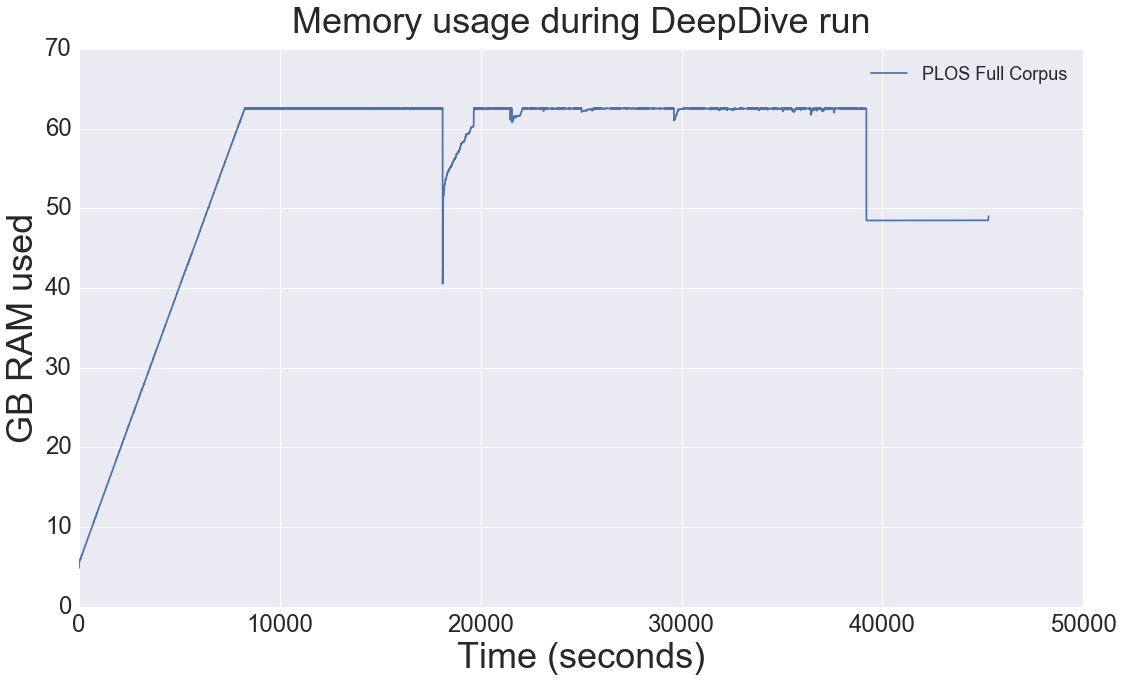

In [6]:
plt.figure(figsize=(18,10))
plt.plot(df.index, 'run_1_mem_used_gb', data=df, label='PLOS Full Corpus')
plt.title('Memory usage during DeepDive run', fontsize=36, y=1.02)
plt.xlabel('Time (seconds)', fontsize=36)
plt.ylabel('GB RAM used', fontsize=36)
plt.tick_params(labelsize=24, length=0)
plt.legend(fontsize=18)
plt.show()

------

### notes

* vary # features and data size, influence of these parameters on max/running memory usage and running CPU usage and overall time

------

## CPU

In [7]:
!head -n25 test_cpu_2016-02-05_115007.out

top - 11:50:07 up 1 day, 21:20,  3 users,  load average: 0.43, 0.46, 0.49
Tasks: 192 total,   1 running, 191 sleeping,   0 stopped,   0 zombie
%Cpu0  :  0.0 us,  0.0 sy,  0.0 ni, 99.8 id,  0.1 wa,  0.0 hi,  0.0 si,  0.0 st
%Cpu1  :  0.0 us,  0.0 sy,  0.0 ni, 99.8 id,  0.1 wa,  0.0 hi,  0.0 si,  0.0 st
%Cpu2  :  0.1 us,  0.0 sy,  0.0 ni, 99.7 id,  0.2 wa,  0.0 hi,  0.0 si,  0.0 st
%Cpu3  :  0.1 us,  0.1 sy,  0.0 ni, 99.8 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem:  65922828 total,  5092456 used, 60830372 free,   736140 buffers
KiB Swap: 33496060 total,        0 used, 33496060 free.  3238628 cached Mem

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND
top - 11:50:08 up 1 day, 21:20,  3 users,  load average: 0.43, 0.46, 0.49
Tasks: 193 total,   2 running, 191 sleeping,   0 stopped,   0 zombie
%Cpu0  :  4.0 us,  1.0 sy,  0.0 ni, 95.0 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
%Cpu1  :  1.0 us,  1.0 sy,  0.0 ni, 36.6 id, 61.4 wa,  0.0 hi,  0.0 si,  0.0 st
%Cpu2  :

In [8]:
import re
from collections import defaultdict

cpu_status = defaultdict(OrderedDict)
# cpu_status will be a dictionary where each key is an OrderedDict
# (each key in each OrderedDict will be a timepoint)
# 
# {'cpu0': OrderedDict([(0, 5.0), (1, 3.0), ...],
#  'cpu1': OrderedDict([(0, 92.0), (1, 93.0), ...])}

regex = re.compile(r"^%(Cpu[0-9]+)\s+:\s*(\d+.\d)\sus")

time_id = -1
with open('test_cpu_2016-02-05_115007.out') as f:
    for line in f:
        if line.startswith('Tasks:'):
            time_id += 1
        matched = regex.match(line)
        if matched:
            cpu_id, val = matched.groups()
            cpu_status[cpu_id][time_id] = float(val)
            
len(cpu_status)

4

In [9]:
df2 = pd.DataFrame()
for cpu_id in sorted(cpu_status):
    df2[cpu_id] = pd.Series(cpu_status[cpu_id])
    
df2.head(25)

,Cpu0,Cpu1,Cpu2,Cpu3
0,0.0,0.0,0.1,0.1
1,4.0,1.0,1.0,1.0
2,64.7,7.1,4.0,9.9
3,34.3,21.2,44.4,23.0
4,33.3,14.0,45.0,77.8
5,28.4,17.0,52.5,24.3
6,23.2,31.4,26.3,14.0
7,0.0,97.0,0.0,0.0
8,0.0,99.0,0.0,1.0
9,87.0,92.0,92.1,90.1


In [10]:
df2.tail()

,Cpu0,Cpu1,Cpu2,Cpu3
39265,0,0,0,0
39266,0,0,1,0
39267,0,0,0,1
39268,0,0,0,0
39269,0,0,0,0


In [11]:
def plot_cpu(df, xlims=None, cores=None):
    
    ''' plot CPU usage by core with xlims = (xmin, xmax)
    '''
    
    plt.figure(figsize=(18, 10))

    if cores:
        cores_to_plot = cores
    else:
        cores_to_plot = list(df)

    for cpu_id in cores_to_plot:
        plt.plot(cpu_id, data=df, label=cpu_id)

    if xlims:
        plt.xlim(xlims)
        plt.title('CPU core usage (user cpu time) during DeepDive run {}'.format(xlims), fontsize=36, y=1.02)
    else:
        plt.title('CPU core usage (user cpu time) during DeepDive run', fontsize=36, y=1.02)
    plt.xlabel('Time (seconds)', fontsize=36)
    plt.ylabel('% CPU core (Us)', fontsize=36)
    plt.tick_params(labelsize=24, length=0)
    plt.legend(fontsize=18, loc='lower left')

    plt.show()

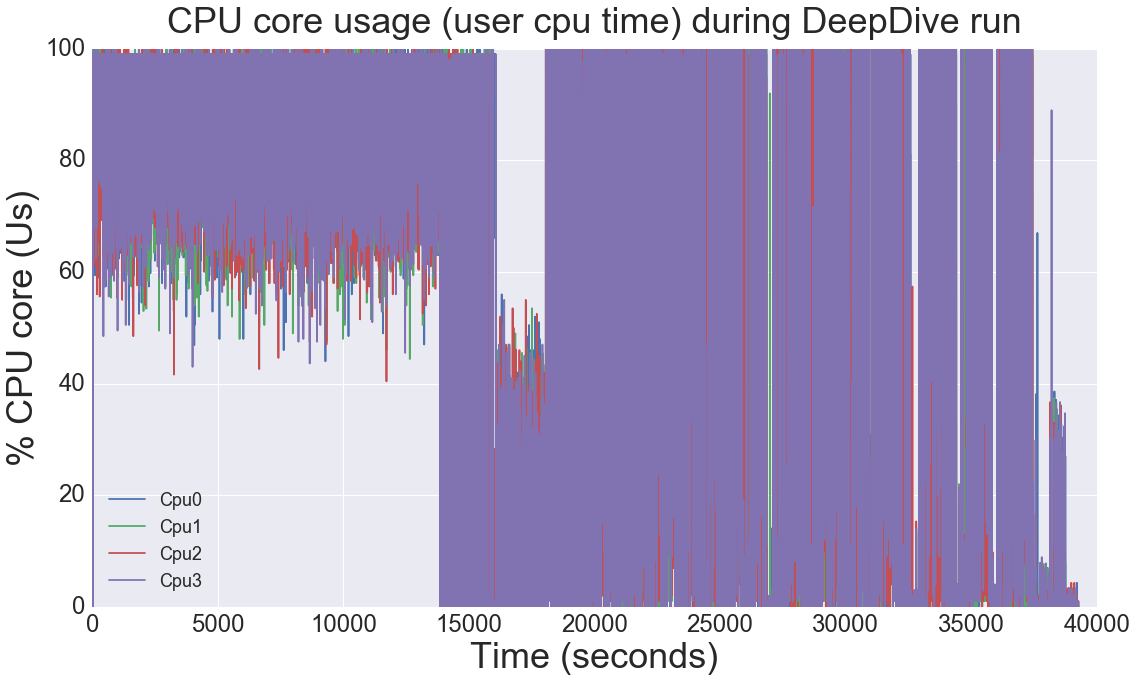

In [12]:
plot_cpu(df2)

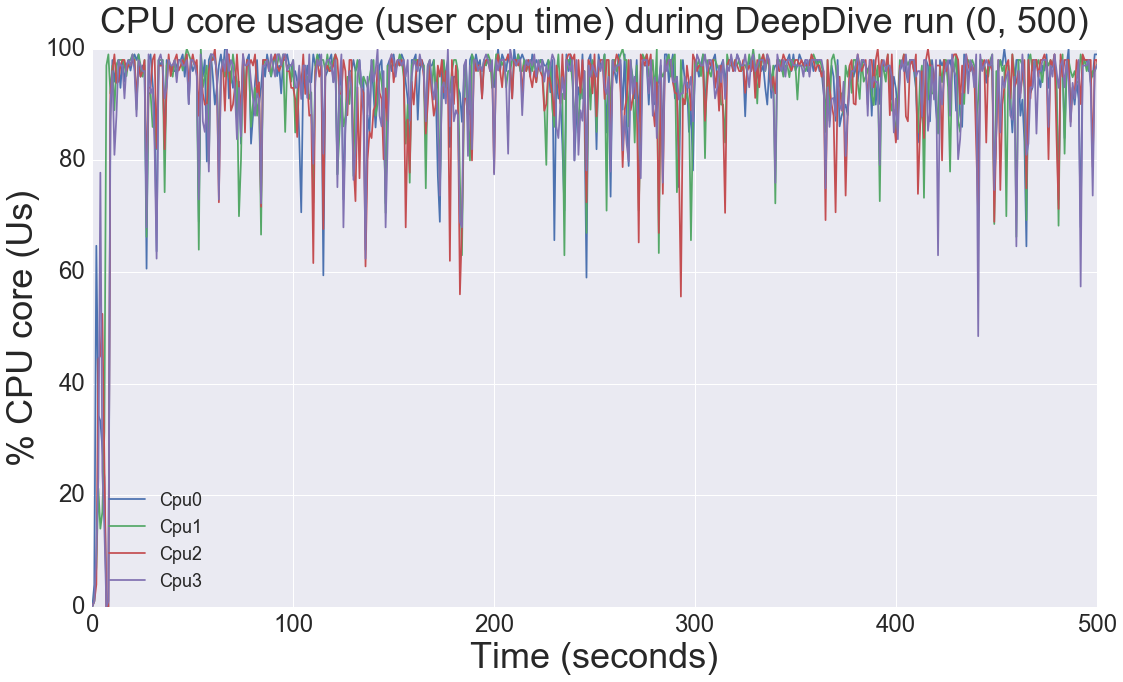

In [13]:
plot_cpu(df2, xlims=(0, 500))

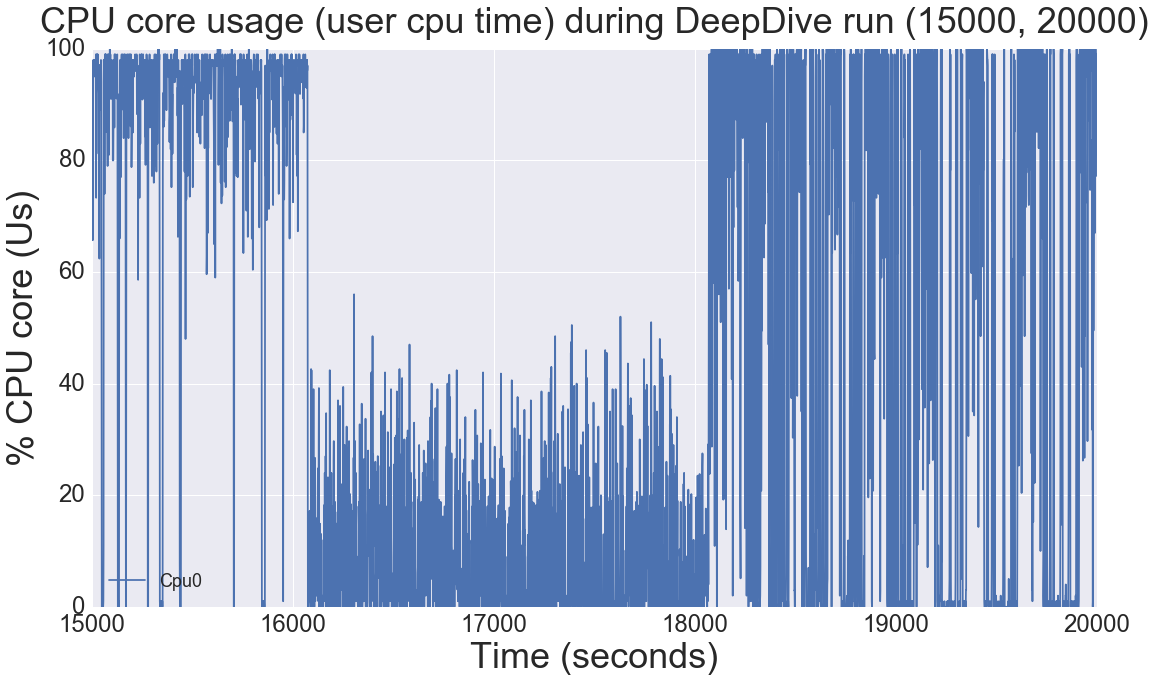

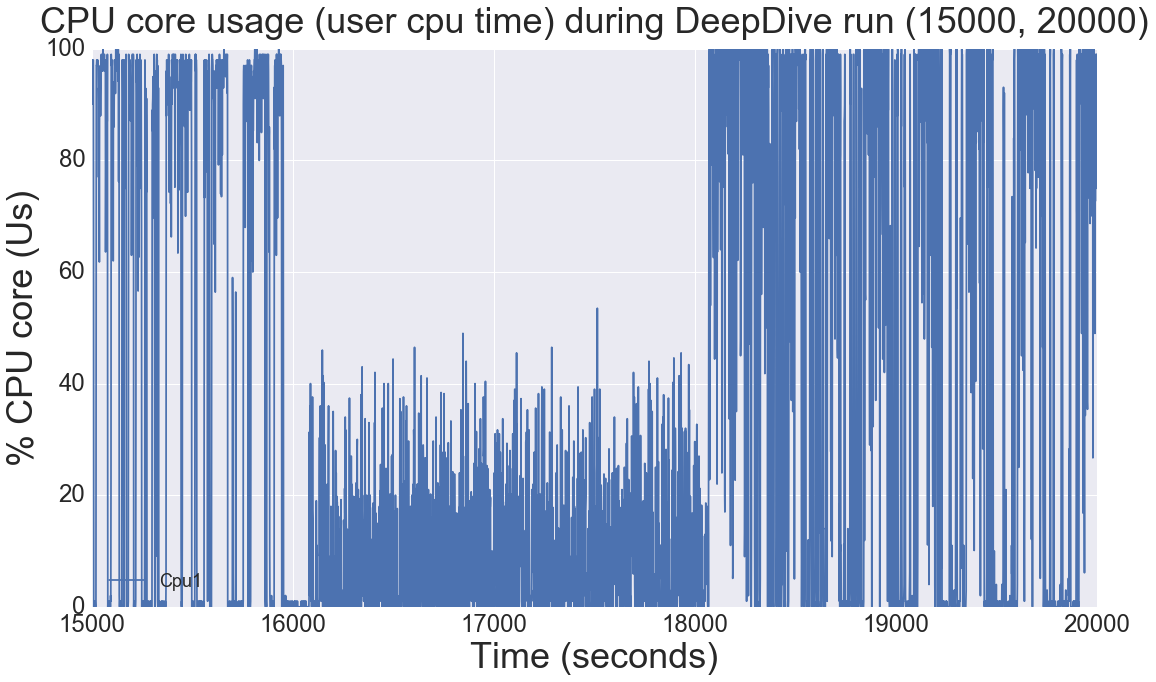

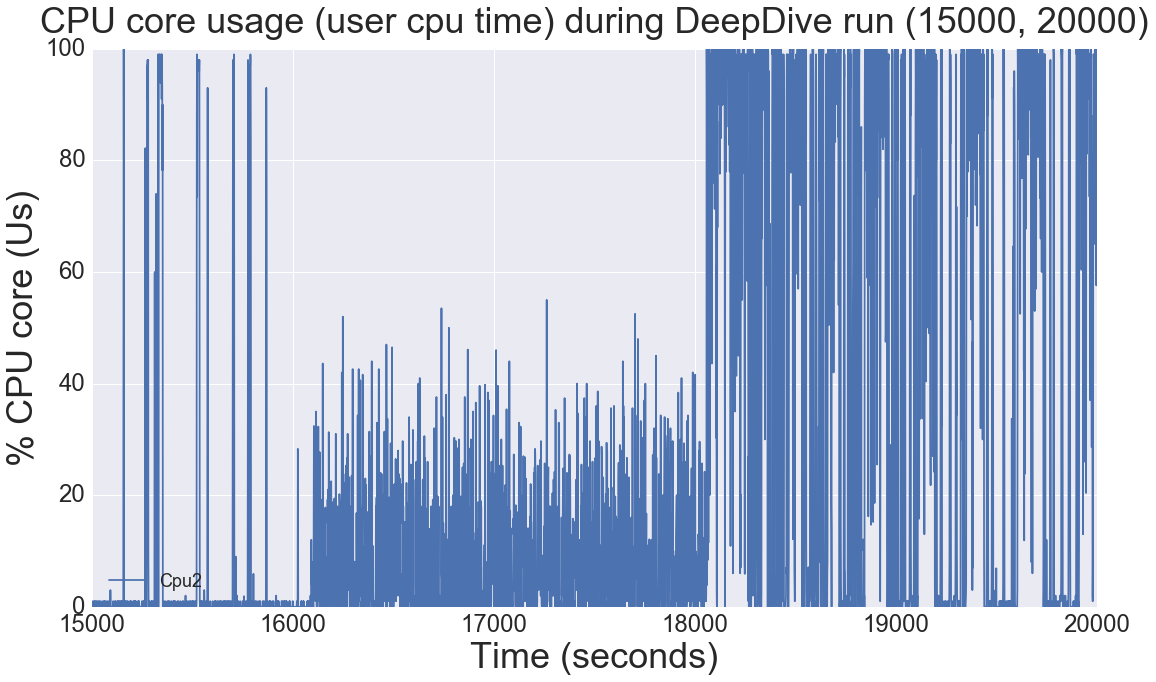

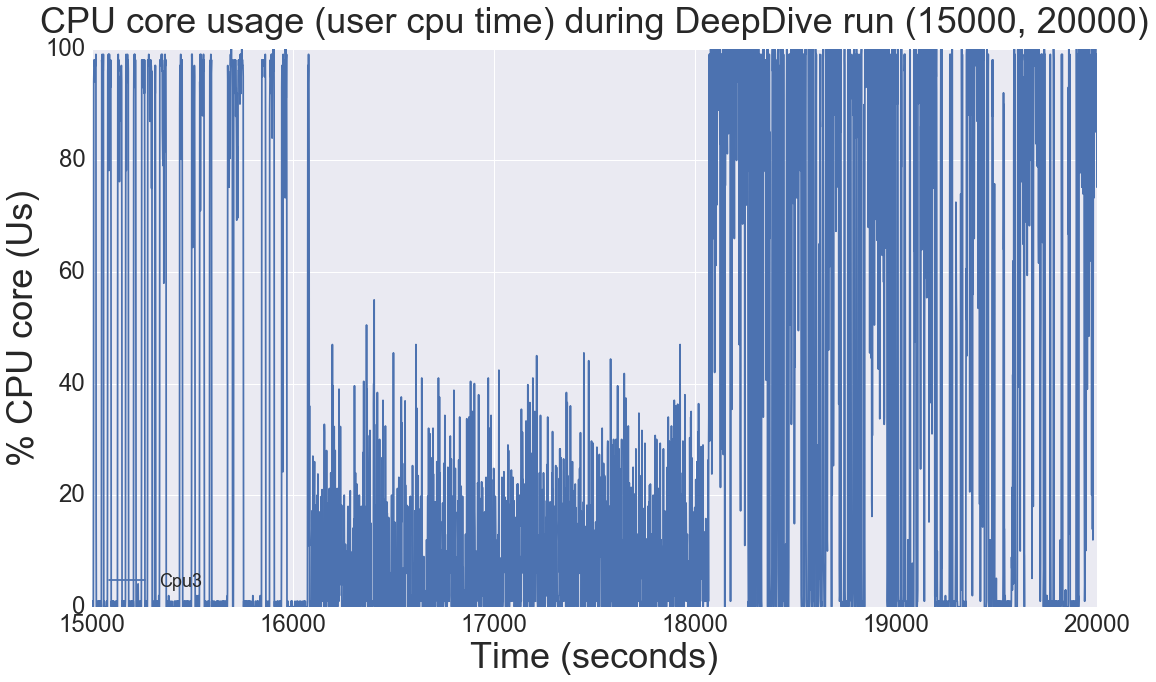

In [14]:
for indiv_core in ['Cpu'+str(x) for x in range(4)]:
    plot_cpu(df2, xlims=(15000, 20000), cores=(indiv_core,))